<a href="https://colab.research.google.com/github/aminecloud9/PFE/blob/main/NSLKDD_Originaldata_GRU_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM, GRU
from keras.optimizers import SGD
import csv

dos_type = ['back','land','neptune','pod','smurf','teardrop','processtable','udpstorm','mailbomb','apache2']
probing_type = ['ipsweep','mscan','nmap','portsweep','saint','satan']
r2l_type = ['ftp_write','guess_passwd','imap','multihop','phf','warezmaster','warezclient','spy','sendmail','xlock','snmpguess','named','xsnoop','snmpgetattack','worm']
u2r_type = ['buffer_overflow','loadmodule','perl','rootkit','xterm','ps','httptunnel','sqlattack']
type2id = {'normal':0}
for i in dos_type:
    type2id[i] = 1
for i in r2l_type:
    type2id[i] = 2
for i in u2r_type:
    type2id[i] = 3
for i in probing_type:
    type2id[i] = 4
# 协议标签转换为数字
all_protocol = ['tcp', 'udp', 'icmp']
protocol_dict = {}
for id,name in enumerate(all_protocol):
    protocol_dict[name] = id
# 服务标签转换为数字
all_service = ['aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'IRC', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois', 'X11', 'Z39_50']
service_dict = {}
for id,name in enumerate(all_service):
    service_dict[name] = id
# FLAG标签转换为数字 
all_flag = ['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']
flag_dict = {}
for id,name in enumerate(all_flag):
    flag_dict[name] = id
all_train_data = []
trainX = []
trainY = []
with open('/content/drive/MyDrive/KDDTrain+.txt', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        all_train_data.append(row)

In [ ]:
for i in all_train_data:
    i[1] = protocol_dict[i[1]]
    i[2] = service_dict[i[2]]
    i[3] = flag_dict[i[3]]
    i[-2] = type2id[i[-2]]
    trainX.append(i[:41])
    trainY.append(i[-2])

    

In [ ]:
import csv
all_test_data = []
testX = []
testY = []
with open('/content/drive/MyDrive/KDDTest+.txt', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        all_test_data.append(row)
for i in all_test_data:
    i[1] = protocol_dict[i[1]]
    i[2] = service_dict[i[2]]
    i[3] = flag_dict[i[3]]
    i[-2] = type2id[i[-2]]
    testX.append(i[:41])
    testY.append(i[-2])

In [ ]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(trainX)
trainX = scaler.transform(trainX)
scaler = Normalizer().fit(testX)
testX = scaler.transform(testX)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:1814: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  check_array(X, accept_sparse='csr')
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:1829: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:1814: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It 

In [ ]:
import numpy as np
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
trainY = keras.utils.to_categorical(trainY, num_classes=5)
testY = keras.utils.to_categorical(testY, num_classes=5)

In [ ]:
model = Sequential()
model.add(GRU(128, input_shape=(1,41)))
model.add(Dropout(0.2))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

'''model = Sequential()
model.add(GRU(64,input_dim=41, return_sequences=True))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(GRU(64,return_sequences=True))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(GRU(64, return_sequences=True))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(GRU(64, return_sequences=False))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(Dense(5))
model.add(Activation('softmax'))'''
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(trainX, trainY,
          epochs=1000,
          batch_size=32, validation_split=0.1, verbose=1)
score = model.evaluate(testX, testY, batch_size=32)

Epoch 1/1000
3543/3543 [==============================] - 13s 3ms/step - loss: 0.4532 - accuracy: 0.8506 - val_loss: 0.2404 - val_accuracy: 0.9279
Epoch 2/1000
3543/3543 [==============================] - 11s 3ms/step - loss: 0.2591 - accuracy: 0.9161 - val_loss: 0.1973 - val_accuracy: 0.9371
Epoch 3/1000
3543/3543 [==============================] - 11s 3ms/step - loss: 0.2207 - accuracy: 0.9297 - val_loss: 0.1827 - val_accuracy: 0.9399
Epoch 4/1000
3543/3543 [==============================] - 11s 3ms/step - loss: 0.2047 - accuracy: 0.9349 - val_loss: 0.1609 - val_accuracy: 0.9463
Epoch 5/1000
3543/3543 [==============================] - 11s 3ms/step - loss: 0.1918 - accuracy: 0.9380 - val_loss: 0.1492 - val_accuracy: 0.9471
Epoch 6/1000
3543/3543 [==============================] - 11s 3ms/step - loss: 0.1766 - accuracy: 0.9421 - val_loss: 0.1374 - val_accuracy: 0.9555
Epoch 7/1000
3543/3543 [==============================] - 11s 3ms/step - loss: 0.1700 - accuracy: 0.9437 - val_loss: 0

In [ ]:
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
cnn = Sequential()
cnn.add(Convolution1D(64, 3,activation='relu',input_shape=(41, 1)))
cnn.add(MaxPooling1D(pool_length=(2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation='sigmoid'))
print(cnn.summary())

TypeError: ignored

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

import matplotlib.pyplot as plt

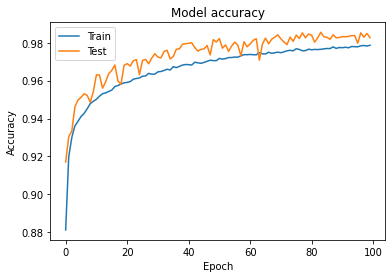

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('acc.png')

AttributeError: ignored

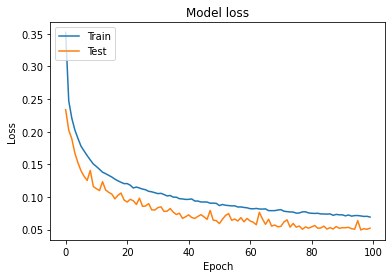

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('loss.png')

keras.utils.print_summary(model, line_length=None, positions=None, print_fn=None)